###**Importing Libraries**

In [1]:
#Library import#
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

### **Setting the Classic Black Scholes Equation**
Black-Scholes Call Option Formula:
\begin{equation}
C(S, t) = S \cdot \Phi(d_1) - K \cdot e^{-r(T-t)} \cdot \Phi(d_2)
\end{equation}

Definition of d1:
\begin{equation}
d_1 = \frac{\ln\left( \frac{S}{K} \right) + \left( r + \frac{\sigma^2}{2} \right)(T - t)}{\sigma \sqrt{T - t}}
\end{equation}

Definition of d2:
\begin{equation}
d_2 = d_1 - \sigma \sqrt{T - t}
\end{equation}

Where:

$C(S, t)$ = Price of a call option at time $t$ \\
$S$ = Current stock price \\
$K$ =  Strike price of the option \\
$T$ = Time to expiration (maturity) of the option \\
$t$ = Current time \\
$r$ = Risk-free interest rate \\
$\sigma$ = Volatility of the underlying stock \\
$\Phi$ =  Cumulative distribution function (CDF) of the standard normal distribution \\
$d_1$ = Intermediate variable representing adjusted log stock price \\
$d_2$ = Intermediate variable representing adjusted probability factor \\


In [2]:
#Setting up Black-Scholes equation

def black_scholes_call(S, K, T, r, sigma):
  """
  Parameters:
  S: Current stock price
  K: Strike price
  T: Time to experation
  r: Risk-free interest rate
  sigma: volatility of underlying stock

  """
  #Calculating d1
  numerator   = math.log(S/K) + (r+0.5*sigma**2)*T
  denominator = sigma*math.sqrt(T)
  d1 = numerator/denominator

  #Calculating d2
  d2 = d1 - sigma*math.sqrt(T)

  #Calculating Phi(d1) and Phi(d2)
  Phi_d1 = norm.cdf(d1)
  Phi_d2 = norm.cdf(d2)

  #Calculating the option price
  call_price = S*Phi_d1 - K*math.exp(-r*T)*Phi_d2

  return call_price

###**Setting up Arbitrary Values for Fixed Input Parameters**
In this exercise, we will use the following fixed input:

$S=42$

$K = 40$

$T = 0.5$

$r = 0.10$

$σ = 0.20$

In [3]:
#Giving parameters to the function (arbitrary numbers)
S     = 42
K     = 40
T     = 0.5
r     = 0.10
sigma = 0.20

call_option_price = black_scholes_call(S, K, T, r, sigma)
print(f"The price of the option is: ${call_option_price:.2f}")

The price of the option is: $4.76


Thus, by the Black-Scholes equation, the price of this call option is $ 4.76.

###**Now Let's set up the Monte Carlo Simulation Function**
### Monte Carlo Simulation for Black-Scholes Option Pricing

### 1. Simulating the Asset Price at Expiration $S_T$ (price of the underlying stock):

$$
S_T = S_0 \times \exp\left( \left( r - \frac{1}{2} \sigma^2 \right) T + \sigma \sqrt{T} \times Z \right)
$$

Where:
- $S_0$  = Current stock price
- r  = Risk-free interest rate
- $\sigma$ = Volatility of the underlying stock
- T = Time to expiration (in years)
- Z  = Random variable drawn from a standard normal distribution

### 2. Calculating the Option Payoff

For a **Call Option**, the payoff at expiration is:

$$
\text{Payoff} = \max(S_T - K, 0)
$$

Where:
- K  = Strike price of the option

### 3. Estimating the Option Price Using Monte Carlo Simulation

The estimated price \( C \) of the call option is the **discounted average** of all simulated payoffs:

$$
C \approx e^{-rT} \times \frac{1}{N} \sum_{i=1}^{N} \max(S_T^{i} - K, 0)
$$

Where:
- N  = Total number of simulations
- $S_T^{i}$= Simulated asset price in the $ i^{th} $ simulation


In [4]:

def monte_carlo_call(S, K, T, r, sigma, num_simulations=100000):  ## The default number of simulations is defined as 100000.
    """
    Estimate the price of a European call option using Monte Carlo simulation.

    Parameters:
    S: Current stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate
    sigma: Volatility of the underlying stock
    num_simulations: Number of simulated paths
    """
    # Random seed for reproducibility (optional)
    np.random.seed(42)

    # Generating random standard normal variables (Z)
    Z = np.random.standard_normal(num_simulations)

    # Simulate the asset price at expiration (S_T)
    S_T = S * np.exp((r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * Z)

    # Calculate the payoff for each simulation
    payoffs = np.maximum(S_T - K, 0)

    # Discount the payoffs back to present value
    discounted_payoffs = np.exp(-r * T) * payoffs

    # Estimate the option price as the average of discounted payoffs
    call_price_mc = np.mean(discounted_payoffs)

    # Calculate the standard error
    std_error = np.std(discounted_payoffs) / math.sqrt(num_simulations)

    return call_price_mc, std_error, S_T, payoffs

###**Giving Inputs to Monte Carlo Simulation on Black Scholes Equation**
All the inputs are the same as before. Number of simluations is still defined as 100000 (change this as desired).

In [5]:
S     = 42       # Current stock price
K     = 40       # Strike price
T     = 0.5      # Time to expiration (in years)
r     = 0.10     # Risk-free interest rate
sigma = 0.20     # Volatility of underlying stock
num_simulations = 100000  # Number of simulations

call_option_mc, std_error, S_T, payoffs = monte_carlo_call(S, K, T, r, sigma, num_simulations)
print(f"Monte Carlo Call Price: ${call_option_mc:.4f}")

Monte Carlo Call Price: $4.7661


###**Plotting All Monte Carlo Simulated Asset Prices $S_T$ in Histogram**

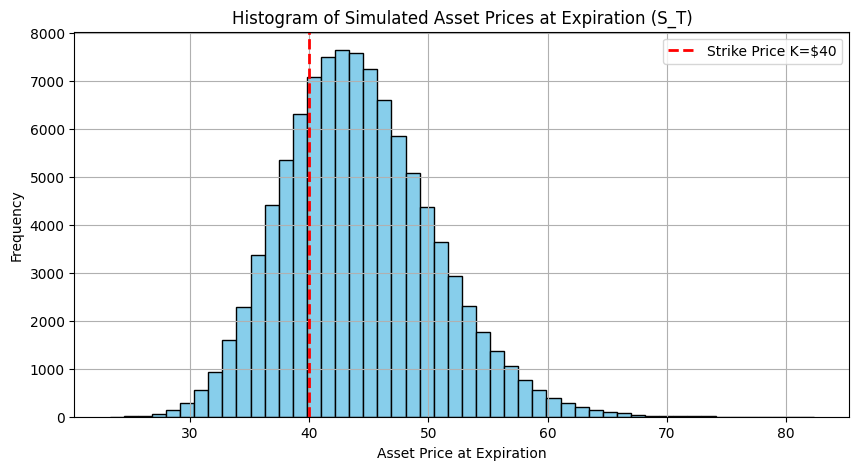

In [6]:
plt.figure(figsize=(10,5))
plt.hist(S_T, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Simulated Asset Prices at Expiration (S_T)')
plt.xlabel('Asset Price at Expiration')
plt.ylabel('Frequency')
plt.axvline(K, color='red', linestyle='dashed', linewidth=2, label=f'Strike Price K=${K}')
plt.legend()
plt.grid(True)
plt.show()

Remeber that the given strike price $K$ is 40 dollars.

If $S_T > K$ , then the option is in the money.

If $S_T <= K$, then the option is out of money.  

###**Plotting a Histogram for the Monte Carlo Simulated Payoffs**

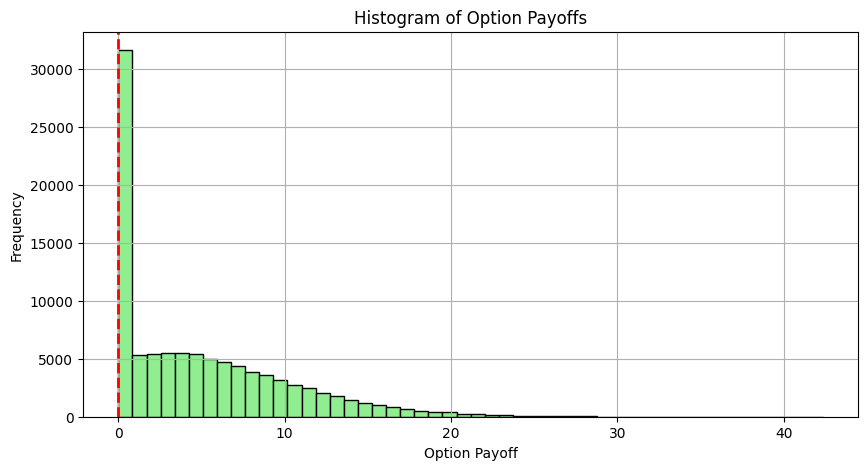

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(payoffs, bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Option Payoffs')
plt.xlabel('Option Payoff')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.grid(True)
plt.show()

The lowest payoff one can get is zero, which happens when the option is out of money.

From the histogram, we can observe that most simulated payoffs are close to zero in this case.